In [272]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, normalize, scale
from sklearn.feature_selection import *
import numpy as np
import calendar
import re
from nltk.tokenize import word_tokenize , sent_tokenize
# from spellchecker import SpellChecker
# import pyphen
# import string
# import json
# from classifiers import *
# from regression import *
# from utils import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import learning_curve
from sklearn.dummy import DummyClassifier
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostRegressor, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [72]:
df_train = pd.read_csv("fresh_train_206_5.csv",engine='python',error_bad_lines=False)
df_test = pd.read_csv("fresh_test_206_5.csv",engine='python',error_bad_lines=False)

In [73]:
df_train.head()

,usd_goal_real,state,usd_pledged_real,imageCount,category_freq,main_category_freq,country_freq,month_sine,day_sine,duration,...,blurbNumWords,blurbAvgSentLength,blurbSpellingErrors,aboutNumWords,aboutAvgSentLength,aboutMaxSyllables,aboutSpellingErrors,risksNumWords,risksAvgSentLength,risksSpellingErrors
0,9.903538,1,10.371176,7,0.021760,0.151582,0.730588,1.224647e-16,0.781831,34,...,25,6.250000,0,755,21.571429,6,14,156,17.333333,0
1,10.463132,-1,8.852565,26,0.017671,0.110302,0.730588,-5.000000e-01,0.974928,37,...,26,8.666667,4,610,21.785714,6,29,90,15.000000,3
2,9.325317,1,9.331629,10,0.012296,0.077590,0.047175,8.660254e-01,-0.433884,39,...,25,12.500000,4,304,23.384615,4,5,272,18.133333,5
3,8.412055,1,8.423322,32,0.008149,0.048866,0.730588,1.224647e-16,0.000000,29,...,22,11.000000,1,770,16.382979,5,9,51,17.000000,1
4,10.036926,-1,3.595118,2,0.002789,0.077590,0.007008,1.000000e+00,0.000000,59,...,28,9.333333,0,288,22.153846,5,67,89,17.800000,22


In [74]:
df_test.head()

,usd_goal_real,state,usd_pledged_real,imageCount,category_freq,main_category_freq,country_freq,month_sine,day_sine,duration,...,blurbNumWords,blurbAvgSentLength,blurbSpellingErrors,aboutNumWords,aboutAvgSentLength,aboutMaxSyllables,aboutSpellingErrors,risksNumWords,risksAvgSentLength,risksSpellingErrors
0,6.571023,1,6.667720,18,0.013452,0.025603,0.007008,-8.660254e-01,0.781831,24,...,29,9.666667,9,585,24.375000,8,84,82,16.400000,15
1,6.477895,1,6.479876,45,0.015431,0.048866,0.114246,1.224647e-16,-0.974928,29,...,23,7.666667,0,331,23.642857,4,9,70,17.500000,1
2,9.736226,-1,6.934777,21,0.008149,0.048866,0.002196,8.660254e-01,0.433884,31,...,14,7.000000,1,855,23.750000,6,31,69,13.800000,0
3,8.006701,-1,0.000000,2,0.007094,0.038939,0.730588,1.224647e-16,0.974928,30,...,18,6.000000,0,143,23.833333,4,6,49,16.333333,0
4,5.660144,1,5.660144,7,0.015056,0.143130,0.114246,1.000000e+00,0.974928,29,...,22,11.000000,1,206,20.600000,6,8,37,18.500000,0


In [75]:
list(df_train.columns) 

['usd_goal_real',
 'state',
 'usd_pledged_real',
 'imageCount',
 'category_freq',
 'main_category_freq',
 'country_freq',
 'month_sine',
 'day_sine',
 'duration',
 'mean_category_goal',
 'mean_main_category_goal',
 'blurbNumWords',
 'blurbAvgSentLength',
 'blurbSpellingErrors',
 'aboutNumWords',
 'aboutAvgSentLength',
 'aboutMaxSyllables',
 'aboutSpellingErrors',
 'risksNumWords',
 'risksAvgSentLength',
 'risksSpellingErrors']

In [153]:
classificationTrain_X = df_train.drop(['state','usd_pledged_real','blurbSpellingErrors'],axis=1)
classificationTrain_y = df_train['state']
classificationTest_X = df_test.drop(['state','usd_pledged_real','blurbSpellingErrors'],axis=1)
classificationTest_y = df_test['state']

# regressionTrain_X = df_train.drop(['state','usd_pledged_real'],axis=1)
# regressionTrain_y = df_train['usd_pledged_real']
# regressionTest_X = df_test.drop(['state','usd_pledged_real'],axis=1)
# regressionTest_y =df_test['usd_pledged_real']

In [77]:
# # removing all failed projects
# regression_train_X_2 = df_train[df_train.state == 1]
# regression_train_X_2 = regression_train_X_2.drop(['state','usd_pledged_real','blurbSpellingErrors'],axis=1)
# regression_train_y_2 = df_train[df_train.state == 1]['usd_pledged_real']


# regression_test_X_2 = df_test[df_test.state == 1]
# regression_test_X_2 = regression_test_X_2.drop(['state','usd_pledged_real','blurbSpellingErrors'],axis=1)
# regression_test_y_2 = df_test[df_test.state == 1]['usd_pledged_real']

In [163]:
regression_train_X_2 = df_train[np.divide(np.exp(df_train.usd_pledged_real-1),np.exp(df_train.usd_goal_real-1))>=0.5]
regression_train_X_2 = regression_train_X_2.drop(['state','usd_pledged_real'],axis=1)
regression_train_y_2 = df_train[np.divide(np.exp(df_train.usd_pledged_real-1),np.exp(df_train.usd_goal_real-1))>=0.5]['usd_pledged_real']

regression_test_X_2 = df_test[np.divide(np.exp(df_test.usd_pledged_real-1),np.exp(df_test.usd_goal_real-1))>=0.5]
regression_test_X_2 = regression_test_X_2.drop(['state','usd_pledged_real'],axis=1)
regression_test_y_2 = df_test[np.divide(np.exp(df_test.usd_pledged_real-1),np.exp(df_test.usd_goal_real-1))>=0.5]['usd_pledged_real']

### AUC, regression metrics, and training plots generation

In [122]:
# function to print the classification report containing the F1 score, precision, recall and accuracy
# and the area under the ROC curve
def aucgenerate(test_y,y_pred):
    print(classification_report(test_y,y_pred))
    print('Area under ROC curve')
    print(roc_auc_score(test_y,y_pred))

def regression_metrics(y_test,y_pred):
    print('Mean Squared Error')
    print(mean_squared_error(y_test,y_pred))
    print('Explained variance')
    print(explained_variance_score(y_test,y_pred))
    print('Mean square log error')
    print(mean_squared_log_error(np.exp(y_test),np.exp(y_pred)))
    print('Median absolute error')
    print(median_absolute_error(y_test, y_pred))
    
def plot_accuracy(func,params,X,y):
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(func(**params), 
                                                            X, 
                                                            y,
                                                            # Number of folds in cross-validation
                                                            cv=10,
                                                            # Evaluation metric
                                                            scoring='accuracy',
                                                            # Use all computer cores
                                                            n_jobs=-1, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    beingsaved = plt.figure()
    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return beingsaved

## Regression Hyperparameter tuning

### Adaboost for regression

In [11]:

hyperparameters_adaboost = {
        'n_estimators' : [40,50,500,1000,1200,1500,1700,2000,3000],
        'learning_rate' : [0.01,0.001,0.1]
}
ada_reg = AdaBoostRegressor()
clf2 = GridSearchCV(ada_reg, hyperparameters_adaboost, scoring=None, n_jobs=-1, iid='deprecated',
             refit=True, cv=10, verbose=25, pre_dispatch='2*n_jobs', return_train_score=False)
clf2.fit(regression_train_X_2,regression_train_y_2)
clf2.best_params_

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 31.5min
[Paralle

{'learning_rate': 0.001, 'n_estimators': 3000}

In [157]:
ada_reg = AdaBoostRegressor(n_estimators=3000,learning_rate=0.001)
t0 = time.time()
ada_reg.fit(regression_train_X_2,regression_train_y_2)
t1 = time.time()
print(t1-t0)

325.8158025741577


In [250]:
# ada_reg.score(regressionTrain_X,regressionTrain_y)
y_pred = ada_reg.predict(regression_test_X_2)
print(mean_squared_error(np.exp(regression_test_y_2),np.exp(y_pred)))
print(ada_reg.score(regression_test_X_2,regression_test_y_2))
print()
regression_metrics(regression_test_y_2,y_pred)

12492115994.68156
0.8513537563714972

Mean Squared Error
0.36800637527387625
Explained variance
0.8551129694458988
Mean square log error
0.3656609234155562
Median absolute error
0.31877089564898586


In [251]:
scaler = StandardScaler()
train_regression_set_scaled = scaler.fit_transform(regression_train_X_2)
train_regression_target_scaled = scaler.fit_transform(regression_train_y_2.values.reshape(-1,1))
test_regression_set_scaled = scaler.fit_transform(regression_test_X_2)
test_regression_target_scaled = scaler.fit_transform(regression_test_y_2.values.reshape(-1,1))
y_pred_scaled = scaler.fit_transform(y_pred.reshape(len(y_pred),1))


In [252]:
regression_metrics(test_regression_target_scaled,y_pred_scaled)
print(ada_reg.score(test_regression_set_scaled,test_regression_target_scaled))
# scaler = StandardScaler()
# train_regression_set_scaled = scaler.fit_transform(train_regression_set_masked)
# train_regression_target_scaled = StandardScaler().fit_transform(train_regression_target_masked.values.reshape(len(train_regression_target_masked),1))[:,0]
# test_regression_set_scaled = scaler.fit_transform(test_regression_set_masked)
# test_regression_target_scaled = StandardScaler().fit_transform(test_regression_target_masked.values.reshape(len(test_regression_target_masked),1))[:,0]

Mean Squared Error
0.1500464240570515
Explained variance
0.8499535759429485
Mean square log error
0.053272106152932666
Median absolute error
0.171681627115991
-27.611333930969632


### Gradient Boosting regression

In [ ]:
hyperparameters_gradientboost = {
        'n_estimators' : [950,1500,2000,2500,3000,5000],
        'learning_rate' : [0.1,0.01],
        'loss' : ['ls', 'lad', 'huber', 'quantile']
}
grad_reg = GradientBoostingRegressor()
clf3 = GridSearchCV(grad_reg, hyperparameters_gradientboost, scoring=None, n_jobs=-1, iid='deprecated',
             refit=True, cv=5, verbose=15, pre_dispatch='2*n_jobs', return_train_score=False)
clf3.fit(regressionTrain_X,regressionTrain_y)
clf3.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

In [ ]:
grad_reg = GradientBoostingRegressor(learning_rate=0.1,n_estimators=950,subsample=1)
t0 = time.time()
grad_reg.fit(regression_train_X_2,regression_train_y_2)
t1 = time.time()
y_pred = grad_reg.predict(regression_test_X_2)

print(mean_squared_error(np.exp(regression_test_y_2-1),np.exp(y_pred-1)))

print(grad_reg.score(regression_test_X_2,regression_test_y_2))

print()

regression_metrics(regression_test_y_2,y_pred)
print()

print(t1-t0)

## Classification hyperparameter tuning

### Decision tree hyperparameter tuning

In [13]:
hyperparameters_decisiontrees = {
        'max_depth' : [5,10,15,30,35,40,45,50],
        'max_leaf_nodes' : [95,100,105],
        'min_samples_leaf' : [1,5,15,20,25,30,35,40,45,50,100]
}
dec_tree = DecisionTreeClassifier()
clf1 = GridSearchCV(dec_tree,hyperparameters_decisiontrees, scoring=None, n_jobs=-1, iid='deprecated',
             refit=True, cv=5, verbose=5, pre_dispatch='2*n_jobs', return_train_score=False)
clf1.fit(classificationTrain_X,classificationTrain_y)
clf1.best_params_

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:  1.2min finished


{'max_depth': 10, 'min_samples_leaf': 30}

In [189]:
params_decision_tree = {
    'max_depth' : 10,
    'min_samples_leaf' : 30,
    'max_leaf_nodes' : 100
}

dec_tree = DecisionTreeClassifier(**params_decision_tree)
t0 = time.time()
dec_tree.fit(classificationTrain_X,classificationTrain_y)
t1 = time.time()
dec_tree.score(classificationTrain_X,classificationTrain_y)
print(dec_tree.score(classificationTest_X,classificationTest_y))
print(t1-t0)
y_pred_dec = dec_tree.predict(classificationTest_X)
aucgenerate(classificationTest_y,y_pred_dec)

0.8749458170784569
0.3578016757965088
              precision    recall  f1-score   support

          -1       0.87      0.76      0.81      4863
           1       0.88      0.94      0.91      8979

    accuracy                           0.87     13842
   macro avg       0.87      0.85      0.86     13842
weighted avg       0.87      0.87      0.87     13842

Area under ROC curve
0.8475688251681094


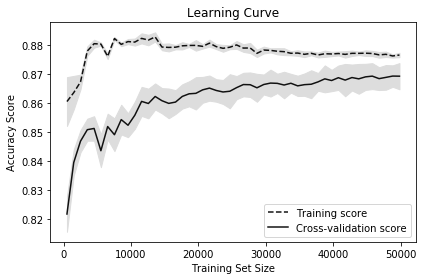

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [124]:
fig1_dt = plot_accuracy(DecisionTreeClassifier,params_decision_tree,classificationTrain_X,classificationTrain_y)
fig1_dt.savefig('decision.eps', format='eps', dpi=1200)

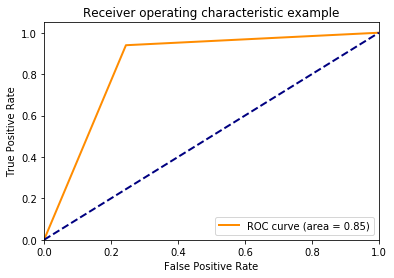

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


TypeError: float() argument must be a string or a number, not 'Figure'

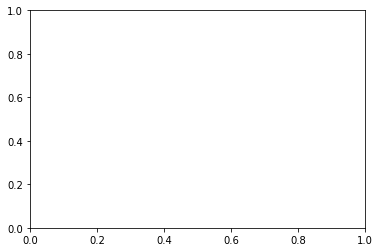

In [197]:
fig2_dt = roc_curve_generation(classificationTest_y,y_pred_dec)
fig2_dt.savefig('decision_tree_roc.eps', format='eps', dpi=1200)

In [265]:
prob_dt = dec_tree.predict_proba(classificationTest_X)
prob_dt = prob_dt[:,1]

### Random forest classification

In [22]:
hyperparameters_randomforest = {
        'n_estimators' : [150,170,200],
        'max_depth' : [200,250]
}
rf_class = RandomForestClassifier(n_jobs=-1)
clf4 = GridSearchCV(rf_class, hyperparameters_randomforest, scoring=None, n_jobs=-1, iid='deprecated',
             refit=True, cv=10, verbose=5, pre_dispatch='2*n_jobs', return_train_score=False)
clf4.fit(classificationTrain_X,classificationTrain_y)
clf4.best_params_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  2.8min remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.8min finished


{'max_depth': 200, 'n_estimators': 200}

In [198]:
params = {
    'n_estimators': 200,
    'max_depth' : 200
}

rf_class = RandomForestClassifier(**params)

t0 = time.time()
rf_class.fit(classificationTrain_X,classificationTrain_y)
t1 = time.time()
print(rf_class.score(classificationTrain_X,classificationTrain_y))
print(rf_class.score(classificationTest_X,classificationTest_y))
y_pred_rf = rf_class.predict(classificationTest_X)
print(t1-t0)

aucgenerate(classificationTest_y,y_pred_rf)

1.0
0.8864325964456004
21.962089776992798
              precision    recall  f1-score   support

          -1       0.89      0.77      0.83      4863
           1       0.88      0.95      0.92      8979

    accuracy                           0.89     13842
   macro avg       0.89      0.86      0.87     13842
weighted avg       0.89      0.89      0.88     13842

Area under ROC curve
0.8596749053020348


In [ ]:
fig1_rf = plot_accuracy(RandomForestClassifier,params,classificationTrain_X,classificationTrain_y)
fig1_rf.savefig('random_forest_accuracy.eps', format='eps', dpi=1200)

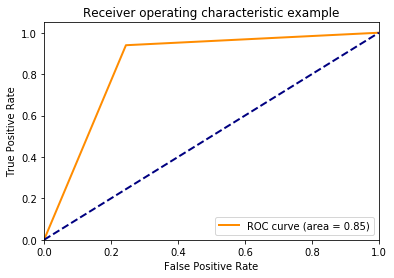

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [132]:
fig2_rf = roc_curve_generation(classificationTest_y,y_pred_rf)
fig2_rf.savefig('figures/random_forest_roc.eps', format='eps', dpi=1200)

In [264]:
prob_rf = rf_class.predict_proba(classificationTest_X)[:,1]

### Gradient boosting classifier

In [8]:
hyperparameters_gradientboost_c = {
        'n_estimators' : [1500,2500],
        'learning_rate' : [0.05,0.1,1],
        'loss' : ['deviance', 'exponential']
}
grad_class = GradientBoostingClassifier()
clf5 = GridSearchCV(grad_class, hyperparameters_gradientboost_c, scoring=None, n_jobs=-1, iid='deprecated',
             refit=True, cv=5, verbose=20, pre_dispatch='2*n_jobs', return_train_score=False)
clf5.fit(classificationTrain_X,classificationTrain_y)
clf5.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed: 23.9min remaining:   49.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 24.1min finished


{'learning_rate': 0.05, 'loss': 'exponential', 'n_estimators': 2500}

In [199]:
params_gradientboosting_classifier = {
    'learning_rate' : 0.05,
    'n_estimators' : 2500,
    'loss' : 'exponential'
}

grad_class = GradientBoostingClassifier(**params_gradientboosting_classifier)
t0 = time.time()
grad_class.fit(classificationTrain_X,classificationTrain_y)
t1 = time.time()
print(t1-t0)
print(grad_class.score(classificationTrain_X,classificationTrain_y))
print(grad_class.score(classificationTest_X,classificationTest_y))
y_pred_gb = grad_class.predict(classificationTest_X)
aucgenerate(classificationTest_y,y_pred_gb)

127.7662844657898
0.9063899725473198
0.8906949862736598
              precision    recall  f1-score   support

          -1       0.88      0.79      0.84      4863
           1       0.89      0.94      0.92      8979

    accuracy                           0.89     13842
   macro avg       0.89      0.87      0.88     13842
weighted avg       0.89      0.89      0.89     13842

Area under ROC curve
0.8682862315173818


135.8337094783783
0.8906949862736598
              precision    recall  f1-score   support

          -1       0.88      0.79      0.84      4863
           1       0.89      0.94      0.92      8979

    accuracy                           0.89     13842
   macro avg       0.89      0.87      0.88     13842
weighted avg       0.89      0.89      0.89     13842

Area under ROC curve
0.8682862315173818


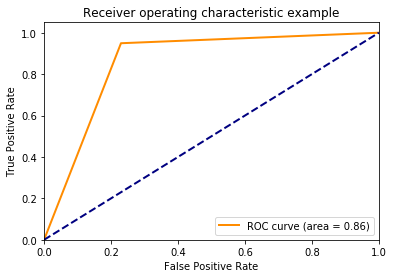

<Figure size 432x288 with 0 Axes>

In [112]:
fig1_gb = plot_accuracy(GradientBoostingClassifier,params_gradientboosting_classifier,classificationTrain_X,classificationTrain_y)
fig1_gb.savefig('figures/gradient_boosting_accuracy.eps', format='eps', dpi=1200)

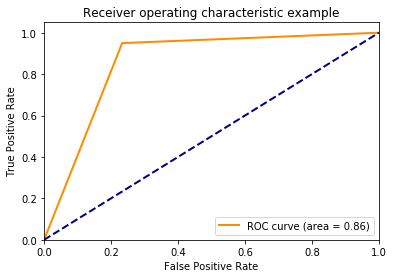

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [135]:
fig2_gb = roc_curve_generation(classificationTest_y,pred_y)
fig2_gb.savefig('figures/gradient_boosting_roc.eps', format='eps', dpi=1200)

In [263]:
prob_gb = grad_class.predict_proba(classificationTest_X)[:,1]

### Adaboost Classifier

In [39]:
# ADABOOST hyperparameter tuning for classification
hyperparameters_adaboost = {
        'n_estimators' : [1000,2000,3000,4000,5000],
        'learning_rate' : [0.1,0.5,1]
}
ada_class = AdaBoostClassifier()
clf6 = GridSearchCV(ada_class, hyperparameters_adaboost, scoring=None, n_jobs=-1, iid='deprecated',
             refit=True, cv=10, verbose=20, pre_dispatch='2*n_jobs', return_train_score=False)
clf6.fit(classificationTrain_X,classificationTrain_y)
clf6.best_params_

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  3

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 52.8min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 53.9min
[Parallel(n_jobs=-1)]: Done 143 out of 150 | elapsed: 59.3min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 63.1min finished


{'learning_rate': 0.5, 'n_estimators': 4000}

In [200]:
params_adaboosting_classifier = {
    'learning_rate':0.5,
    'n_estimators':4000
#     'loss':'exponential'
}

ada_class = AdaBoostClassifier(**params_adaboosting_classifier)
t0 = time.time()
ada_class.fit(classificationTrain_X,classificationTrain_y)
t1 = time.time()
print(t1-t0)
print(ada_class.score(classificationTrain_X,classificationTrain_y))
print(ada_class.score(classificationTest_X,classificationTest_y))
y_pred_ab = ada_class.predict(classificationTest_X)
aucgenerate(classificationTest_y,y_pred_ab)

241.94541263580322
0.889755815633579
0.887949718248808
              precision    recall  f1-score   support

          -1       0.88      0.79      0.83      4863
           1       0.89      0.94      0.92      8979

    accuracy                           0.89     13842
   macro avg       0.89      0.87      0.87     13842
weighted avg       0.89      0.89      0.89     13842

Area under ROC curve
0.8656046025275647


In [ ]:
fig1 = plot_accuracy(AdaBoostClassifier,params_adaboosting_classifier,classificationTrain_X,classificationTrain_y)
fig1.savefig('figures/adaboost_accuracy.eps', format='eps', dpi=1200)

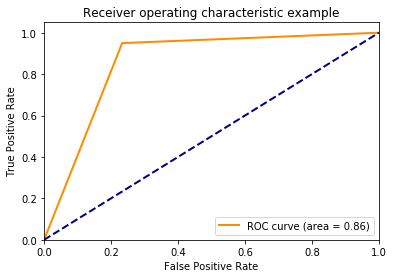

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [138]:
fig2_ab = roc_curve_generation(classificationTest_y,y_pred_ab)
fig2_ab.savefig('figures/adaboost_roc.eps', format='eps', dpi=1200)

In [262]:
prob_ada = ada_class.predict_proba(classificationTest_X)[:,1]

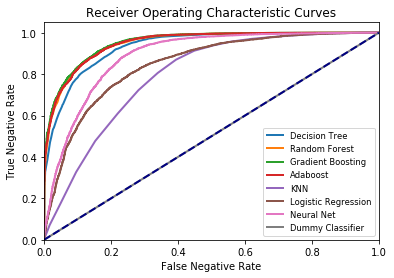

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [311]:
# prob = model.predict_proba(classificationTest_X)
y_pred_combined = np.array([prob_dt,prob_rf,prob_gb,prob_ada,prob_knn,prob_lr,prob_nn,prob_dummy])
y_test_combined = np.array([classificationTest_y,classificationTest_y,classificationTest_y,classificationTest_y,
                            classificationTest_y,classificationTest_y,classificationTest_y,classificationTest_y])
f = roc_curve_generation(y_test_combined,y_pred_combined)
f.savefig('figures/ROC_2.eps', format='eps', dpi=1200)

In [266]:
knn_clf = KNeighborsClassifier(n_neighbors=20, weights='uniform', algorithm='auto', leaf_size=30, 
                            p=1, metric='minkowski', metric_params=None, n_jobs=None)
knn_clf.fit(classificationTrain_X,classificationTrain_y)
y_pred_knn = knn_clf.predict(classificationTest_X)
prob_knn = knn_clf.predict_proba(classificationTest_X)[:,1]

In [267]:
lr_clf = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr_clf.fit(classificationTrain_X,classificationTrain_y)
y_pred_lr = lr_clf.predict(classificationTest_X)
prob_lr = lr_clf.predict_proba(classificationTest_X)[:,1]

In [271]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(classificationTrain_X,classificationTrain_y)
prob_dummy = dummy_clf.predict_proba(classificationTest_X)[:,1]

In [302]:
prob_nn = np.load('file.npy')

In [310]:
from matplotlib.font_manager import FontProperties

def roc_curve_generation(y_test,y_pred):
    fnr = dict()
    tnr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fnr[i], tnr[i],_ = roc_curve(y_test[i,:], y_pred[i,:],drop_intermediate=False,pos_label=1)
        roc_auc[i] = auc(fnr[i], tnr[i])
    fig = plt.figure()
    lw = 2

    l = ['Decision Tree','Random Forest','Gradient Boosting','Adaboost','KNN','Logistic Regression','Neural Net','Dummy Classifier']
    for i in range(len(l)):
        plt.plot(fnr[i], tnr[i],lw=lw, label=l[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Negative Rate')
    plt.ylabel('True Negative Rate')
    plt.title('Receiver Operating Characteristic Curves')
    fontP = FontProperties()
    fontP.set_size('small')
    plt.legend(loc="lower right",prop=fontP)
    plt.show()
    return fig